In [4]:
import numpy as np
import pandas as pd
import viz

In [52]:
np.random.seed(29)

In [6]:
n_trials = nrows = 10000
n_dice = ncols = 3

rolls = np.random.choice([1,2,3,4,5,6], nrows * ncols).reshape(nrows, ncols)

In [7]:
rolls

array([[6, 4, 5],
       [6, 3, 1],
       [1, 2, 2],
       ...,
       [6, 2, 1],
       [3, 4, 3],
       [4, 2, 4]])

In [12]:
sums_by_trial = rolls.sum(axis=1)

In [13]:
sums_by_trial

array([15, 10,  5, ...,  9, 10, 10])

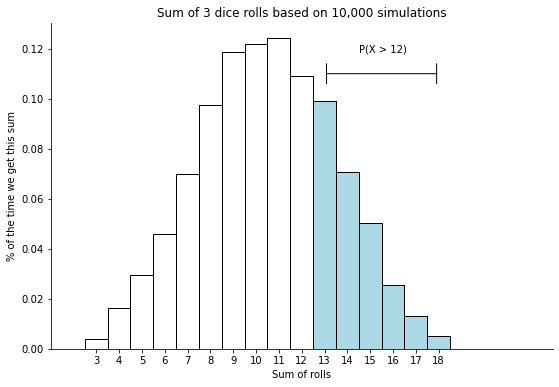

In [14]:
viz.simulation_example1(sums_by_trial)

In [26]:
wins = sums_by_trial > 12

In [16]:
wins

array([ True, False, False, ..., False, False, False])

In [27]:
win_rate = wins.astype(int).mean()

In [28]:
win_rate

0.2633

In [21]:
expected_earnings = win_rate * 15
cost = 5
expected_profit = expected_earnings - cost
expected_profit

-1.0505000000000004

In [31]:
wins = sums_by_trial >= 12

In [32]:
win_rate = wins.astype(int).mean()

In [34]:
win_rate

0.3724

In [36]:
expected_earnings = win_rate * 15
expected_profit = expected_earnings - cost
expected_profit

0.5860000000000003

There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

In [83]:
p_nap = .3
num_days = num_cols = 2
n_simulated_weekends = num_rows = 10 ** 4

In [84]:
data = np.random.random((num_rows, num_cols))

In [85]:
data

array([[0.23095302, 0.19903031],
       [0.16601164, 0.2465589 ],
       [0.11247362, 0.53455145],
       ...,
       [0.53122465, 0.40786725],
       [0.39056082, 0.80486245],
       [0.71228542, 0.73174217]])

In [86]:
naps = data < p_nap

In [87]:
naps

array([[ True,  True],
       [ True,  True],
       [ True, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [88]:
naps.sum(axis=1)

array([2, 2, 1, ..., 0, 0, 0])

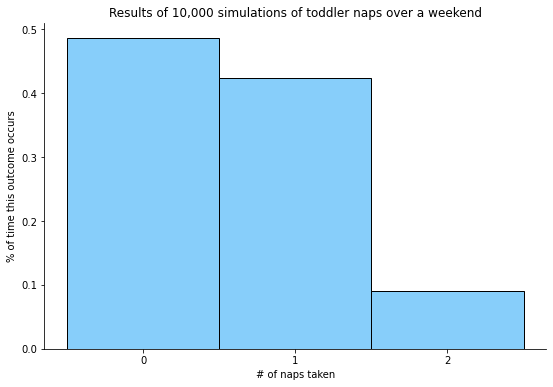

In [89]:
viz.simulation_example2(naps)

In [104]:
(naps.sum(axis=1) >= 1).mean()

0.5139

In [91]:
(naps.sum(axis=1) == 0).mean()

0.4861

What is the probability of getting at least one 3 in 3 dice rolls?

In [94]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3
rolls = np.random.choice([1,2,3,4,5,6], nrows * ncols).reshape(nrows,ncols)

(pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis=1).mean())
rolls

array([[1, 2, 4],
       [2, 6, 3],
       [3, 5, 6],
       ...,
       [3, 1, 4],
       [2, 3, 2],
       [1, 1, 1]])

#### 1. How likely is it that you roll doubles when rolling two dice?

In [96]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 2
rolls = np.random.choice([1,2,3,4,5,6], nrows * ncols).reshape(nrows,ncols)

(pd.DataFrame(rolls).apply(lambda row: row[0]==row[1], axis=1).mean())

0.1645

#### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [119]:
n_simulations = nrows = 10**5
n_coin_fips = ncols = 8
flips = np.random.choice([0,1], nrows * ncols).reshape(nrows,ncols)
(pd.DataFrame(flips).apply(lambda row: row.sum() == 3, axis=1).mean())

0.21737

In [120]:
(pd.DataFrame(flips).apply(lambda row: row.sum() > 3, axis=1).mean())

0.63688

#### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [105]:
probability_ds = .25
num_bilboards = ncols = 2
n_simulations = nrows = 10 ** 5

data = np.random.random((nrows, ncols))

array([[0.59316591, 0.48699068],
       [0.94077835, 0.85319875],
       [0.35212891, 0.68204662],
       ...,
       [0.74987148, 0.50216583],
       [0.8684533 , 0.75616246],
       [0.1347326 , 0.35576849]])

In [106]:
face_on_billboard = data < probability_ds

In [107]:
face_on_billboard

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [ True, False]])

In [108]:
face_on_billboard.sum(axis=1)

array([0, 0, 0, ..., 0, 0, 1])

In [109]:
(face_on_billboard.sum(axis=1) == 2).mean()

0.06291

#### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

In [122]:
simulations = 10 ** 5
days = 5
mean_poptart = 3
poptart_std = 1.5
poptarts_purchased = np.random.normal(mean_poptart, poptart_std, (simulations,days)).astype(int)


In [123]:
poptarts_purchased

array([[2, 2, 1, 5, 1],
       [4, 4, 2, 2, 1],
       [4, 1, 0, 3, 3],
       ...,
       [3, 4, 0, 1, 1],
       [5, 2, 2, 0, 0],
       [4, 2, 3, 1, 6]])

In [124]:
(pd.DataFrame(poptarts_purchased).apply(lambda row: row.sum() < 17, axis=1).mean())

0.87848

#### 5. Compare Heights

* Men have an average height of 178 cm and standard deviation of 8cm.
* Women have a mean of 170, sd = 6cm.
* Since you have means and standard deviations, you can use np.random.normal to generate observations.
* If a man and woman are chosen at random, P(woman taller than man)?

In [125]:
male_heights = np.random.normal(178, 8, 10**5)
female_heights = np.random.normal(170, 6, 10**5)
taller_woman = female_heights > male_heights

In [139]:
taller_woman.mean()

0.21137

#### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

In [157]:
probability = 0.004
num_sim = num_rows = 10 ** 5
num_cols = 50
num_cols2 = 100

downloads = np.random.random((num_rows,num_cols))

In [158]:
fail = downloads < probability

downloads_df = pd.DataFrame(downloads)

In [159]:
fail.mean()

0.0039932

In [160]:
downloads2 = np.random.random((num_rows,num_cols2))

In [162]:
fail2 = downloads2 < probability

In [163]:
fail2.mean()

0.0040281